In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# main euler method function
# takes fns on a 2x1 array [x,y], initial state s, graph window, steps, and returns array of points to be plotted
def euler(xdot,ydot,s,xlims=[-5,5],ylims=[-5,5],steps=500,length=1):
    # s should be a 2x1 array, NOT a list
    path = [] # initialize solution set as a list, so we don't have to count ahead of time (possible, but tedious to implement)
    path.append(s) # append initial state to the path list
    curr = s
    step_size = length/steps
    
    t = 0
    while t < length:
        curr = curr + np.array([xdot(curr),ydot(curr)])*step_size
        path.append(curr)
        t += step_size
    return path

In [18]:
# rk4 solution calculator
# algorithm lightly modified from example code
def rk4(xdot,ydot,s,xlims=[-5,5],ylims=[-5,5],steps=500,length=1):
    path = []
    path.append(s)
    curr = s
    step_size = length/steps
    
    t=0
    while t < length:
        xy = lambda v: np.array([xdot(v),ydot(v)])
        k1 = xy(curr)*step_size
        k2 = xy(curr+k1/2)*step_size
        k3 = xy(curr+k2/2)*step_size
        k4 = xy(curr+k2/2)*step_size
        
        curr = curr + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        path.append(curr)
        t += step_size
    return path

In [27]:
# Here I'm going to set up a Graph class, as a container for all the settings and such for each graph
# utility function first tho
# integration method is set to rk4 by default
def grid(ar1,ar2=None):
    if ar2 is None:
        ar2 = ar1
    return np.array(np.meshgrid(ar1,ar2)).T.reshape([len(ar1)*len(ar2),2])
    
    
class Graph():
    methods = {'euler':euler,'rk4':rk4}
    def __init__(self, xlims=[-5,5], ylims=[-5,5],xdot=None,ydot=None,method='rk4'):
        self.xlims = xlims
        self.ylims = ylims
        ar = np.arange(-1,2)
        self.startpoints = np.array(np.meshgrid(ar,ar)).T.reshape([9,2])
        self.steps = 100
        self.trajectories = []
        self.xdot=xdot
        self.ydot=ydot
        self.length=1
        self.method=method
    def add_diffeq(self,xdot,ydot=0):
        self.xdot=xdot
        self.ydot=ydot
    def calc_sols(self,start_points=None,steps=None,length=None,method=None): # calculate and store solutions in self.trajectories
        if start_points is None:
            startpoints = self.startpoints
        if steps is None:
            steps = self.steps
        if length is None:
            length = self.length
        if method is None:
            method = self.method
            
        for i in range(startpoints.shape[0]):
            self.trajectories.append(self.methods[method](xdot,ydot,self.startpoints[i],steps=steps,length=length))
        print(f'solutions calculated using {method}')
    def jplot(self,xlims=None,ylims=None): # "just plot", without recalculating trajectories
        if xlims is None:
            xlims = self.xlims
        if ylims is None:
            ylims = self.ylims
        
        tmp_trj = self.trajectories # tmp variable because this *might* speed things up
        tmp_trj = np.array(tmp_trj) # also make it into an array so we can plot it
        for i in range(tmp_trj.shape[0]):
            plt.plot(tmp_trj[i,:,0],tmp_trj[i,:,1])
            plt.xlim(self.xlims[0],self.xlims[1])
            plt.ylim(self.ylims[0],self.ylims[1])
        plt.show()
    def plot(self,xlims=None,ylims=None,start_points=None,steps=None,length=None,method=None):
        self.calc_sols(start_points=start_points,steps=steps,length=length,method=method)
        self.jplot(xlims=xlims,ylims=ylims)
    def start_grid(self,ar1,ar2=None):
        self.startpoints = grid(ar1,ar2)
    def start_around_centers(self,centers,rad=1,density=2): # centers is an array
        grids = []
        for center in centers:
            ar1 = np.arange(center[0]-rad,center[0]+rad+1,1/density)
            ar2 = np.arange(center[1]-rad,center[1]+rad+1,1/density)
            grids.append(grid(ar1,ar2))
        self.startpoints = grids[0]
        for g in grids:
            self.startpoints = np.concatenate((self.startpoints,g),axis=0)

solutions calculated using rk4


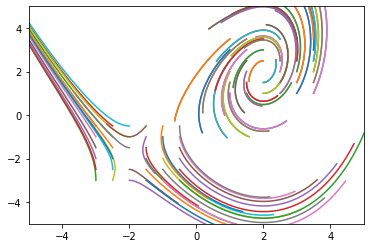

In [43]:
# PROBLEM 6.3.1 (STROGATZ)

xdot = lambda v: v[0]-v[1]
ydot = lambda v: v[0]**2-4

graph = Graph(xdot=xdot,ydot=ydot)

centers = np.array([[2,2],[-2,-2]])
graph.start_around_centers(centers)
graph.plot()

solutions calculated using rk4


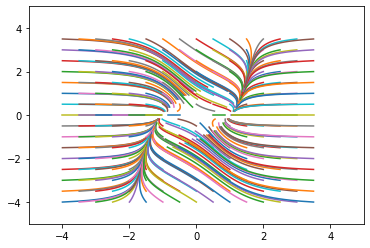

In [40]:
# PROBLEM 6.3.4 (STROGATZ)

xdot = lambda v: v[1]+v[0]-v[0]**3
ydot = lambda v: -v[1]

graph = Graph(xdot=xdot,ydot=ydot)

graph.start_grid(np.arange(-4,4,.5),np.arange(-4,4,.5))
graph.plot(method='rk4',length=1)